<a href="https://colab.research.google.com/github/Nico-GP/Coding-Dojo_Track3/blob/main/Week11/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO**: Fashion MNIST
## Creado por: Nicolas Gonzalez
### Descripcion: Clasificacion de prendas de vestir con RNC
* Creado: 13/03/22
* Ultima Actualizacion: 13/03/22

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Base de datos de entrenamiento

In [72]:
import pandas as pd
train = pd.read_csv('/content/drive/My Drive/CodingDojo/Week11/fashion-mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [74]:
train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Base de datos de validacion

In [75]:
test = pd.read_csv('/content/drive/My Drive/CodingDojo/Week11/fashion-mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [77]:
test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

Se normaliza la matriz de caractersiticas

In [79]:
X_train = train.drop(columns = 'label')/255
X_val = test.drop(columns = 'label')/255
y_train = train['label']
y_val = test['label']

Se dividen los datos de entrenamiento en entrenamiento y testeo

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 3)

Se remodela la forma de los datos

In [91]:
X_train = np.array(X_train).reshape(X_train.shape[0], 28, 28, 1)
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1)

Se convierten a valorescategoricos

In [82]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

Forma de los datos

In [83]:
shape = X_train.shape[1 : 4]
shape

(28, 28, 1)

Se crea el modelo

In [84]:
model = Sequential()

model.add(Conv2D(filters = 32, input_shape = shape, activation = 'relu', kernel_size = 3))

model.add(MaxPooling2D(pool_size = 2))

Dropout(0.2)

model.add(Flatten())

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

Se ajustan los datos

In [85]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    batch_size = 5000,
                    epochs = 100)

Epoch 1/100
9/9 [==============================] - 17s 2s/step - loss: 1.9743 - acc: 0.4606 - val_loss: 1.5536 - val_acc: 0.6573
Epoch 2/100
9/9 [==============================] - 15s 2s/step - loss: 1.2894 - acc: 0.6857 - val_loss: 1.0141 - val_acc: 0.7216
Epoch 3/100
9/9 [==============================] - 16s 2s/step - loss: 0.8923 - acc: 0.7327 - val_loss: 0.7691 - val_acc: 0.7537
Epoch 4/100
9/9 [==============================] - 16s 2s/step - loss: 0.7248 - acc: 0.7588 - val_loss: 0.6643 - val_acc: 0.7640
Epoch 5/100
9/9 [==============================] - 16s 2s/step - loss: 0.6485 - acc: 0.7741 - val_loss: 0.6065 - val_acc: 0.7848
Epoch 6/100
9/9 [==============================] - 16s 2s/step - loss: 0.5991 - acc: 0.7911 - val_loss: 0.5635 - val_acc: 0.8035
Epoch 7/100
9/9 [==============================] - 16s 2s/step - loss: 0.5600 - acc: 0.8075 - val_loss: 0.5304 - val_acc: 0.8139
Epoch 8/100
9/9 [==============================] - 16s 2s/step - loss: 0.5294 - acc: 0.8184 - val

Visualizacion de perdida en entrenamiento y testeo

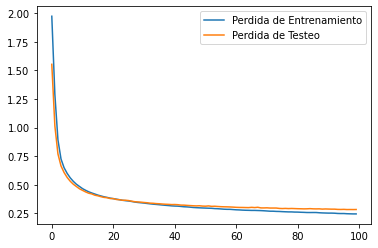

In [86]:
plt.plot(history.history['loss'], label = 'Perdida de Entrenamiento');
plt.plot(history.history['val_loss'], label = 'Perdida de Testeo');
plt.legend();

Visualizacion de precision en entrenamiento y testeo

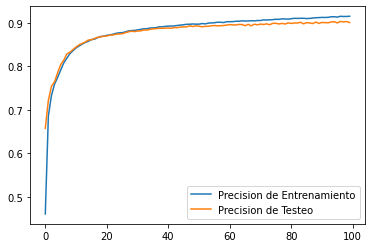

In [87]:
plt.plot(history.history['acc'], label = 'Precision de Entrenamiento');
plt.plot(history.history['val_acc'], label = 'Precision de Testeo');
plt.legend();

Se valida el modelo

In [88]:
X_val = np.array(X_val).reshape(X_val.shape[0], 28, 28, 1)

In [89]:
preds = np.argmax(model.predict(X_val), axis = -1)

Precision del modelo con datos de validacion

In [90]:
accuracy_score(y_val, preds)

0.904

> 90,4% de precision de validacion